In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import unicodedata
from IPython.display import display
from mpl_toolkits.basemap import Basemap
%matplotlib inline
from sklearn import datasets, svm, metrics
import sys
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn import decomposition
from sklearn import datasets

master_dir = '/home/sam/Documents/architecture/'
photo_dir = master_dir + 'data/processed/photos/'
arch_full = pd.read_csv(master_dir + 'data/processed/architecture.csv')
arch_light = pd.read_csv(master_dir + 'data/processed/architecture_text_only.csv')

def GradBoostTest():
    
    #Generates a random list to split the dataset into training and test sets
    msk = np.random.rand(len(X)) < 0.5
    X_train = X[msk]
    X_test = X[msk]
    Y_train = Y[msk]
    Y_test = Y[msk]
    
    #Choosing the model to use
    clf = GradientBoostingClassifier()
    #Training the model on the training set
    clf.fit(X_train, Y_train)
    #Using the model to create a predicted_Y_test
    predicted_Y_test = clf.predict(X_test)
    #Scoring the difference between the Y_test and the predicted_Y_test
    score = clf.score(X_test, Y_test)
    #     AUC = roc_auc_score(Y_test, predicted_Y_test)
    #     importances = clf.feature_importances_
    #     f1 = f1_score(Y_test, predicted_Y_test)
    probs = clf.staged_predict_proba(X)
    #return(AUC, f1, 'For ' + i +'_against_' + j)
    return(score, probs, predicted_Y_test, Y_test)

In [7]:
def trim_top_vcs(dataframe, column_name, top_no):
    vc_list = (dataframe[column_name].value_counts())
    arch_trim = dataframe[dataframe[column_name].isin(list(vc_list[: top_no].index))]
    return arch_trim

arch_trim = trim_top_vcs(arch_light, 'building_main_style', 15)

at_classes = (arch_trim.building_main_style.value_counts())
dictionary = dict(zip(at_classes.index, range(len(at_classes))))

X = arch_trim[arch_light.columns[3:6]]
Y = arch_trim.replace({"building_main_style": dictionary}).building_main_style

0.973892773893
0.969917958067
0.96981981982
0.97406733394
0.97379123362
0.965898617512
0.969062784349
0.968764568765
0.968007312614
0.972299168975


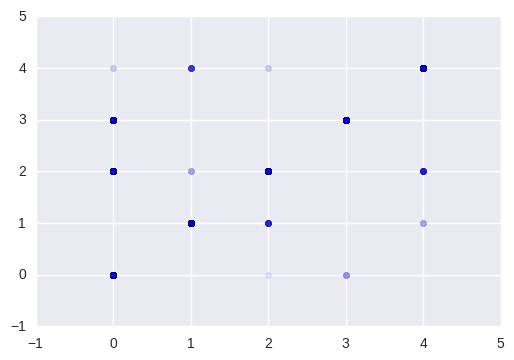

In [163]:
for x in range(10): 
    sols = GradBoostTest()
    print sols[0]
    plt.scatter(sols[2], sols[3], alpha = 0.1)

In [90]:
#arch_light[arch_light.building_main_style.isin(['modern'])].sum().sort_values(ascending = False)

In [39]:
new = arch_light.groupby('building_main_style').sum()

In [77]:
feature_check = pd.DataFrame((arch_light.sum().sort_values(ascending = False)), columns = ['count'])

In [8]:
arch_trim.building_main_style.value_counts()

modern              3438
medieval             349
neoclassical         206
post-modern          193
baroque              185
gothic               175
romanesque           164
ancient-roman        162
deconstructivist     143
renaissance          130
islamic              123
neo-gothic           117
vernacular            92
spanish-colonial      89
neo-renaissance       84
Name: building_main_style, dtype: int64

0.966238422468
0.956585942115
0.953629032258
0.960680751174
0.963955913018
0.96191319752
0.959571938169
0.96357226792
0.961946902655
0.965902410347


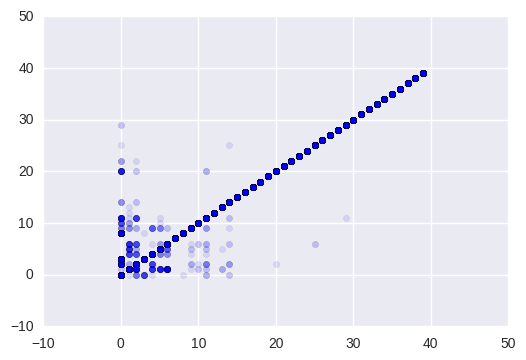

In [136]:
at_classes

modern                      3438
medieval                     349
neoclassical                 206
post-modern                  193
baroque                      185
gothic                       175
romanesque                   164
ancient-roman                162
deconstructivist             143
renaissance                  130
islamic                      123
neo-gothic                   117
vernacular                    92
spanish-colonial              89
neo-renaissance               84
buddhist                      81
japanese                      74
byzantine                     70
ancient-greek                 65
hindu                         63
structural-expressionist      59
ancient-egyptian              59
early-modern                  54
chinese                       54
ancient-mayan                 53
beaux-arts                    51
early-christian               45
art-deco                      38
muscovite                     36
neo-byzantine                 36
art-nouvea

In [127]:
real = sols[3].values
predict = sols[2]

reals_incorrect = real[real != predict]
incorrect_predicts = predict[real != predict]

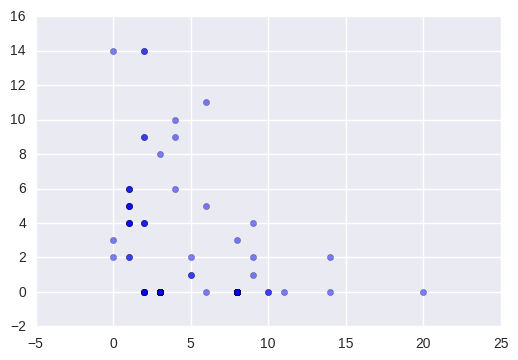

In [128]:
plt.scatter(reals_incorrect, incorrect_predicts, alpha = 0.5)

In [152]:
arch_light

,building_architect,building_city,building_country,building_date,building_latitude,building_longitude,building_name,feature_abusir-necropolis,feature_acrylic,feature_addition,...,feature_zeche-zollverein,feature_zero-energy,feature_zig-zag,feature_ziggurat,feature_zinc,feature_Oya-stone,building_main_style,building_sub_style,building_main_type,building_sub_type
0,NaN,bari,italy,-1200,41.194099,16.487419,dolmen-of-bisceglie,0,0,0,...,0,0,0,0,0,0,vernacular,italian,religious,monument
1,NaN,madrid,spain,1926,40.442684,-3.699627,moseo-geominero-madrid,0,0,0,...,0,0,0,0,0,0,neoclassical,NaN,public,museum
2,NaN,tampa,united_states,1968,27.962130,-82.504959,futuro-house-tampa,0,0,0,...,0,0,0,0,0,0,modern,futurist,residential,single-family
3,NaN,nimes,france,10,43.838188,4.356106,maison-carree,0,0,0,...,0,0,0,0,0,0,ancient-roman,NaN,religious,temple
4,zofa,zwolle,the_netherlands,2005,52.539909,6.078663,zrzv-club-house,0,0,0,...,0,0,0,0,0,0,modern,NaN,public,recreational
5,NaN,la_paz,bolivia,1835,-16.496149,-68.134079,metropolitan-cathedral-of-la-paz,0,0,0,...,0,0,0,0,0,0,neo-renaissance,NaN,religious,cathedral
6,mecanoo,rotterdam,the_netherlands,2005,51.903999,4.485538,monte-video,0,0,0,...,0,0,1,0,0,0,modern,NaN,tower,mixed-use
7,NaN,cleveland,united_states,1991,41.500999,-81.693817,key-tower,0,0,0,...,0,0,0,0,0,0,post-modern,NaN,tower,office
8,NaN,messina,italy,1200,38.191238,15.556250,catalani-church-messina,0,0,0,...,0,0,0,0,0,0,norman,NaN,religious,church
9,NaN,miami_beach,united_states,1927,25.782623,-80.132637,miami-old-city-hall,0,0,0,...,0,0,0,0,0,0,neo-mediterranean,NaN,civic,city-hall
